In [81]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time
from collections import Counter
import collections, re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
! ls -l 'nba_game_stats_1721.csv'

-rw-r--r--  1 amarisefthimiou  staff  2223684 May  5 22:03 nba_game_stats_1721.csv


In [3]:
df = pd.read_csv('nba_game_stats_1721.csv')

In [4]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,0,366,22017,1610612737,ATL,Atlanta Hawks,21701214,2018-04-10,ATL vs. PHI,L,...,0.692,8.0,31.0,39.0,27,10.0,3,10,24,-8.0
1,1,367,22017,1610612737,ATL,Atlanta Hawks,21701202,2018-04-08,ATL @ BOS,W,...,0.786,5.0,32.0,37.0,23,7.0,4,13,19,6.0
2,2,368,22017,1610612737,ATL,Atlanta Hawks,21701184,2018-04-06,ATL @ WAS,W,...,0.696,7.0,43.0,50.0,24,5.0,5,18,22,6.0
3,3,369,22017,1610612737,ATL,Atlanta Hawks,21701172,2018-04-04,ATL vs. MIA,L,...,0.647,10.0,38.0,48.0,20,5.0,6,15,16,-29.0
4,4,370,22017,1610612737,ATL,Atlanta Hawks,21701158,2018-04-03,ATL @ MIA,L,...,0.733,12.0,37.0,49.0,24,10.0,1,15,15,-3.0
5,5,371,22017,1610612737,ATL,Atlanta Hawks,21701147,2018-04-01,ATL vs. ORL,W,...,1.000,5.0,47.0,52.0,33,0.0,3,14,15,6.0
6,6,372,22017,1610612737,ATL,Atlanta Hawks,21701130,2018-03-30,ATL vs. PHI,L,...,0.667,15.0,44.0,59.0,24,9.0,4,16,14,-10.0
7,7,373,22017,1610612737,ATL,Atlanta Hawks,21701120,2018-03-28,ATL @ MIN,L,...,0.826,4.0,33.0,37.0,26,10.0,2,19,22,-6.0
8,8,374,22017,1610612737,ATL,Atlanta Hawks,21701101,2018-03-25,ATL @ HOU,L,...,0.909,7.0,38.0,45.0,18,5.0,2,13,14,-19.0
9,9,375,22017,1610612737,ATL,Atlanta Hawks,21701087,2018-03-23,ATL @ GSW,L,...,0.450,5.0,39.0,44.0,24,5.0,5,11,14,-12.0


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SEASON_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')


In [6]:
df = df[df.TEAM_NAME=='New York Knicks'] #filter df for a specific team by team name

In [7]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
1504,1504,340,22017,1610612752,NYK,New York Knicks,21701220,2018-04-11,NYK @ CLE,W,...,0.923,8.0,31.0,39.0,30,10.0,3,15,22,12.0
1505,1505,341,22017,1610612752,NYK,New York Knicks,21701207,2018-04-09,NYK vs. CLE,L,...,0.500,8.0,29.0,37.0,26,4.0,7,14,20,-16.0
1506,1506,342,22017,1610612752,NYK,New York Knicks,21701192,2018-04-07,NYK vs. MIL,L,...,1.000,13.0,31.0,44.0,30,3.0,7,8,17,-13.0
1507,1507,343,22017,1610612752,NYK,New York Knicks,21701186,2018-04-06,NYK vs. MIA,W,...,0.667,9.0,42.0,51.0,33,7.0,5,12,23,24.0
1508,1508,344,22017,1610612752,NYK,New York Knicks,21701159,2018-04-03,NYK vs. ORL,L,...,0.750,7.0,35.0,42.0,17,5.0,9,11,17,-24.0
1509,1509,345,22017,1610612752,NYK,New York Knicks,21701139,2018-03-31,NYK vs. DET,L,...,0.833,9.0,31.0,40.0,31,4.0,1,14,18,-6.0
1510,1510,346,22017,1610612752,NYK,New York Knicks,21701118,2018-03-28,NYK @ PHI,L,...,0.769,10.0,36.0,46.0,20,4.0,5,16,22,-17.0
1511,1511,347,22017,1610612752,NYK,New York Knicks,21701103,2018-03-26,NYK @ CHA,L,...,1.000,11.0,30.0,41.0,25,6.0,1,10,27,-9.0
1512,1512,348,22017,1610612752,NYK,New York Knicks,21701098,2018-03-25,NYK @ WAS,W,...,0.867,10.0,34.0,44.0,26,10.0,6,14,19,4.0
1513,1513,349,22017,1610612752,NYK,New York Knicks,21701081,2018-03-23,NYK vs. MIN,L,...,0.706,10.0,32.0,42.0,25,9.0,0,10,27,-4.0


In [8]:
#print(df['PLUS_MINUS']) #plus minus

In [9]:
#print(df['AST']) #assists

In [10]:
#print(df['REB']) #rebounds

In [11]:
#print(df['TOV']) #tov

In [12]:
#print(df['GAME_ID'])

In [13]:
#print(df['GAME_DATE'])

In [67]:
df['WL'].value_counts()

L    266
W    166
Name: WL, dtype: int64

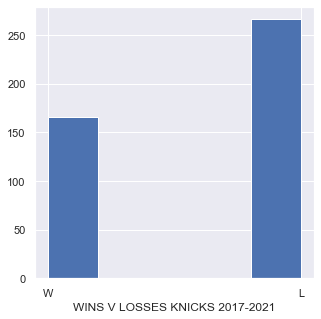

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
plt.hist(df['WL'], bins=5)
plt.xlabel("WINS V LOSSES KNICKS 2017-2021")
plt.show()

In [15]:
#all Knicks games in 2017
df_2017 = df.loc[(df['GAME_DATE'] >= '2017-01-01') & (df['GAME_DATE'] <= '2018-01-01')]

In [16]:
df_2017.head(10)

,Unnamed: 0,Unnamed: 0.1,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
1550,1550,386,22017,1610612752,NYK,New York Knicks,21700532,2017-12-30,NYK @ NOP,W,...,0.857,9.0,42.0,51.0,24,6.0,7,6,24,2.0
1551,1551,387,22017,1610612752,NYK,New York Knicks,21700519,2017-12-28,NYK @ SAS,L,...,0.909,12.0,32.0,44.0,31,6.0,8,9,26,-12.0
1552,1552,388,22017,1610612752,NYK,New York Knicks,21700509,2017-12-27,NYK @ CHI,L,...,0.692,7.0,44.0,51.0,21,6.0,5,12,17,-5.0
1553,1553,389,22017,1610612752,NYK,New York Knicks,21700493,2017-12-25,NYK vs. PHI,L,...,0.643,18.0,27.0,45.0,18,7.0,5,10,21,-7.0
1554,1554,390,22017,1610612752,NYK,New York Knicks,21700471,2017-12-22,NYK @ DET,L,...,0.833,16.0,35.0,51.0,25,6.0,9,14,20,3.6
1555,1555,391,22017,1610612752,NYK,New York Knicks,21700468,2017-12-21,NYK vs. BOS,W,...,0.846,11.0,38.0,49.0,13,8.0,3,17,20,9.0
1556,1556,392,22017,1610612752,NYK,New York Knicks,21700441,2017-12-18,NYK @ CHA,L,...,0.800,10.0,27.0,37.0,21,10.0,5,17,16,-18.0
1557,1557,393,22017,1610612752,NYK,New York Knicks,21700431,2017-12-16,NYK vs. OKC,W,...,0.808,6.0,29.0,35.0,21,9.0,3,13,22,15.0
1558,1558,394,22017,1610612752,NYK,New York Knicks,21700414,2017-12-14,NYK @ BKN,W,...,0.864,12.0,28.0,40.0,23,11.0,4,13,23,7.0
1559,1559,395,22017,1610612752,NYK,New York Knicks,21700399,2017-12-12,NYK vs. LAL,W,...,0.727,15.0,34.0,49.0,25,7.0,7,14,16,4.0


In [17]:
df_2017['WL'].value_counts() #wins vs losses in 2017

L    27
W    19
Name: WL, dtype: int64

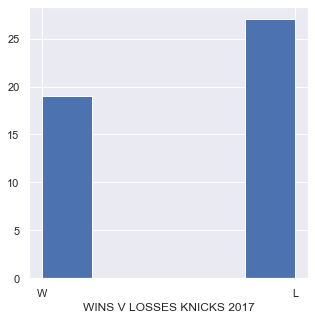

In [18]:
sns.set(rc={'figure.figsize':(5,5)})
plt.hist(df_2017['WL'], bins=5)
plt.xlabel("WINS V LOSSES KNICKS 2017")
plt.show()

In [19]:
#all Knicks games in 2018
df_2018 = df.loc[(df['GAME_DATE'] >= '2018-01-01') & (df['GAME_DATE'] <= '2019-01-01')]

In [20]:
df_2018.head(10)

,Unnamed: 0,Unnamed: 0.1,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
1504,1504,340,22017,1610612752,NYK,New York Knicks,21701220,2018-04-11,NYK @ CLE,W,...,0.923,8.0,31.0,39.0,30,10.0,3,15,22,12.0
1505,1505,341,22017,1610612752,NYK,New York Knicks,21701207,2018-04-09,NYK vs. CLE,L,...,0.500,8.0,29.0,37.0,26,4.0,7,14,20,-16.0
1506,1506,342,22017,1610612752,NYK,New York Knicks,21701192,2018-04-07,NYK vs. MIL,L,...,1.000,13.0,31.0,44.0,30,3.0,7,8,17,-13.0
1507,1507,343,22017,1610612752,NYK,New York Knicks,21701186,2018-04-06,NYK vs. MIA,W,...,0.667,9.0,42.0,51.0,33,7.0,5,12,23,24.0
1508,1508,344,22017,1610612752,NYK,New York Knicks,21701159,2018-04-03,NYK vs. ORL,L,...,0.750,7.0,35.0,42.0,17,5.0,9,11,17,-24.0
1509,1509,345,22017,1610612752,NYK,New York Knicks,21701139,2018-03-31,NYK vs. DET,L,...,0.833,9.0,31.0,40.0,31,4.0,1,14,18,-6.0
1510,1510,346,22017,1610612752,NYK,New York Knicks,21701118,2018-03-28,NYK @ PHI,L,...,0.769,10.0,36.0,46.0,20,4.0,5,16,22,-17.0
1511,1511,347,22017,1610612752,NYK,New York Knicks,21701103,2018-03-26,NYK @ CHA,L,...,1.000,11.0,30.0,41.0,25,6.0,1,10,27,-9.0
1512,1512,348,22017,1610612752,NYK,New York Knicks,21701098,2018-03-25,NYK @ WAS,W,...,0.867,10.0,34.0,44.0,26,10.0,6,14,19,4.0
1513,1513,349,22017,1610612752,NYK,New York Knicks,21701081,2018-03-23,NYK vs. MIN,L,...,0.706,10.0,32.0,42.0,25,9.0,0,10,27,-4.0


In [21]:
df_2018['WL'].value_counts() #wins vs losses in 2018

L    69
W    25
Name: WL, dtype: int64

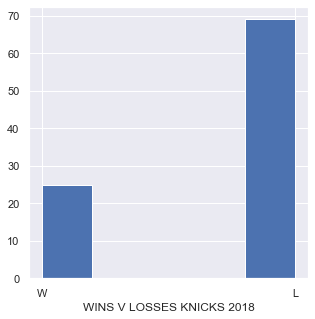

In [22]:
sns.set(rc={'figure.figsize':(5,5)})
plt.hist(df_2018['WL'], bins=5)
plt.xlabel("WINS V LOSSES KNICKS 2018")
plt.show()

In [23]:
#all Knicks games in 2019
df_2019 = df.loc[(df['GAME_DATE'] >= '2019-01-01') & (df['GAME_DATE'] <= '2020-01-01')]

In [24]:
df_2019.head(10)

,Unnamed: 0,Unnamed: 0.1,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
4437,4437,248,22018,1610612752,NYK,New York Knicks,21801223,2019-04-10,NYK vs. DET,L,...,0.720,4.0,29.0,33.0,23,7.0,5,11,17,-26.0
4438,4438,249,22018,1610612752,NYK,New York Knicks,21801213,2019-04-09,NYK @ CHI,W,...,0.615,11.0,50.0,61.0,17,0.0,10,9,16,10.0
4439,4439,250,22018,1610612752,NYK,New York Knicks,21801204,2019-04-07,NYK vs. WAS,W,...,0.737,7.0,36.0,43.0,24,5.0,9,15,14,3.0
4440,4440,251,22018,1610612752,NYK,New York Knicks,21801184,2019-04-05,NYK @ HOU,L,...,0.593,5.0,48.0,53.0,22,3.0,6,15,17,-24.0
4441,4441,252,22018,1610612752,NYK,New York Knicks,21801166,2019-04-03,NYK @ ORL,L,...,0.857,8.0,31.0,39.0,21,10.0,5,12,18,-14.0
4442,4442,253,22018,1610612752,NYK,New York Knicks,21801155,2019-04-01,NYK vs. CHI,W,...,0.840,6.0,38.0,44.0,24,2.0,9,16,18,8.0
4443,4443,254,22018,1610612752,NYK,New York Knicks,21801141,2019-03-30,NYK vs. MIA,L,...,0.840,8.0,34.0,42.0,20,10.0,7,18,16,-8.0
4444,4444,255,22018,1610612752,NYK,New York Knicks,21801125,2019-03-28,NYK vs. TOR,L,...,0.750,14.0,40.0,54.0,16,3.0,5,16,22,-25.0
4445,4445,256,22018,1610612752,NYK,New York Knicks,21801095,2019-03-24,NYK vs. LAC,L,...,0.880,13.0,31.0,44.0,22,5.0,7,14,24,-11.0
4446,4446,257,22018,1610612752,NYK,New York Knicks,21801082,2019-03-22,NYK vs. DEN,L,...,0.762,8.0,37.0,45.0,20,3.0,5,7,15,-18.0


In [25]:
df_2019['WL'].value_counts() #wins vs losses in 2019

L    67
W    21
Name: WL, dtype: int64

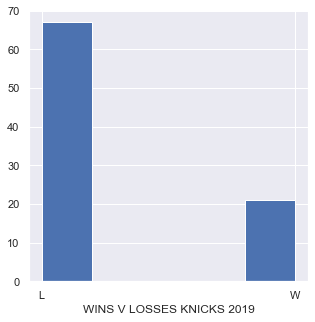

In [26]:
sns.set(rc={'figure.figsize':(5,5)})
plt.hist(df_2019['WL'], bins=5)
plt.xlabel("WINS V LOSSES KNICKS 2019")
plt.show()

In [27]:
#all Knicks games in 2020
df_2020 = df.loc[(df['GAME_DATE'] >= '2020-01-01') & (df['GAME_DATE'] <= '2021-01-01')]

In [28]:
df_2020.head(10)

,Unnamed: 0,Unnamed: 0.1,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
7286,7286,173,22019,1610612752,NYK,New York Knicks,21900969,2020-03-11,NYK @ ATL,W,...,0.735,6.0,41.0,47.0,32,14.0,9,12,23,5.0
7287,7287,174,22019,1610612752,NYK,New York Knicks,21900961,2020-03-10,NYK @ WAS,L,...,0.742,8.0,28.0,36.0,30,10.0,3,18,29,-7.0
7288,7288,175,22019,1610612752,NYK,New York Knicks,21900955,2020-03-08,NYK vs. DET,W,...,0.720,13.0,38.0,51.0,15,10.0,5,9,16,12.0
7289,7289,176,22019,1610612752,NYK,New York Knicks,21900932,2020-03-06,NYK vs. OKC,L,...,0.773,13.0,35.0,48.0,19,4.0,8,12,20,-23.0
7290,7290,177,22019,1610612752,NYK,New York Knicks,21900921,2020-03-04,NYK vs. UTA,L,...,0.833,11.0,31.0,42.0,23,3.0,1,13,18,-8.0
7291,7291,178,22019,1610612752,NYK,New York Knicks,21900903,2020-03-02,NYK vs. HOU,W,...,0.633,20.0,45.0,65.0,26,6.0,7,17,19,2.0
7292,7292,179,22019,1610612752,NYK,New York Knicks,21900887,2020-02-29,NYK vs. CHI,W,...,0.697,17.0,33.0,50.0,29,6.0,4,16,19,10.0
7293,7293,180,22019,1610612752,NYK,New York Knicks,21900873,2020-02-27,NYK @ PHI,L,...,0.583,9.0,30.0,39.0,28,2.0,3,8,11,-9.0
7294,7294,181,22019,1610612752,NYK,New York Knicks,21900864,2020-02-26,NYK @ CHA,L,...,0.647,13.0,29.0,42.0,22,5.0,6,15,24,-6.0
7295,7295,182,22019,1610612752,NYK,New York Knicks,21900853,2020-02-24,NYK @ HOU,L,...,0.700,16.0,38.0,54.0,20,12.0,8,17,21,-11.0


In [29]:
df_2020['WL'].value_counts() #wins vs losses in 2020

L    25
W    17
Name: WL, dtype: int64

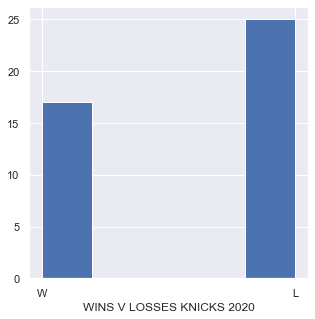

In [30]:
sns.set(rc={'figure.figsize':(5,5)})
plt.hist(df_2020['WL'], bins=5)
plt.xlabel("WINS V LOSSES KNICKS 2020")
plt.show()

In [31]:
#all Knicks games in 2021
df_2021 = df.loc[(df['GAME_DATE'] >= '2021-01-01') & (df['GAME_DATE'] <= '2022-01-01')]

In [32]:
df_2021.head(10)

,Unnamed: 0,Unnamed: 0.1,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
9830,9830,92,42020,1610612752,NYK,New York Knicks,42000135,2021-06-02,NYK vs. ATL,L,...,0.833,14.0,31.0,45.0,19,5.0,4,16,22,-14.0
9831,9831,93,42020,1610612752,NYK,New York Knicks,42000134,2021-05-30,NYK @ ATL,L,...,0.826,6.0,33.0,39.0,24,7.0,2,9,20,-17.0
9832,9832,94,42020,1610612752,NYK,New York Knicks,42000133,2021-05-28,NYK @ ATL,L,...,0.900,13.0,32.0,45.0,14,6.0,2,11,21,-11.0
9833,9833,95,42020,1610612752,NYK,New York Knicks,42000132,2021-05-26,NYK vs. ATL,W,...,0.739,13.0,41.0,54.0,15,8.0,2,10,20,9.0
9834,9834,96,42020,1610612752,NYK,New York Knicks,42000131,2021-05-23,NYK vs. ATL,L,...,0.733,13.0,36.0,49.0,21,3.0,4,11,16,-2.0
9835,9835,97,22020,1610612752,NYK,New York Knicks,22001073,2021-05-16,NYK vs. BOS,W,...,0.789,4.0,37.0,41.0,16,7.0,6,10,17,4.0
9836,9836,98,22020,1610612752,NYK,New York Knicks,22001064,2021-05-15,NYK vs. CHA,W,...,0.800,7.0,43.0,50.0,29,3.0,7,9,20,9.0
9837,9837,99,22020,1610612752,NYK,New York Knicks,22000458,2021-05-13,NYK vs. SAS,W,...,1.000,10.0,38.0,48.0,23,7.0,8,10,19,4.0
9838,9838,100,22020,1610612752,NYK,New York Knicks,22001041,2021-05-11,NYK @ LAL,L,...,0.913,5.0,36.0,41.0,19,8.0,3,9,21,-2.0
9839,9839,101,22020,1610612752,NYK,New York Knicks,22001019,2021-05-09,NYK @ LAC,W,...,1.000,8.0,37.0,45.0,25,7.0,5,10,17,6.0


In [100]:
df_2021['WL'].value_counts() #wins vs losses in 2021

W    65
L    53
Name: WL, dtype: int64

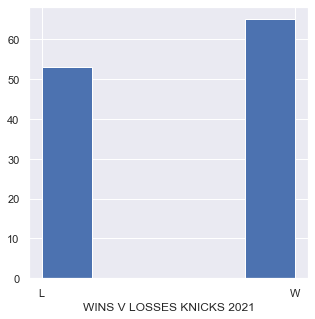

In [34]:
sns.set(rc={'figure.figsize':(5,5)})
plt.hist(df_2021['WL'], bins=5)
plt.xlabel("WINS V LOSSES KNICKS 2021")
plt.show()

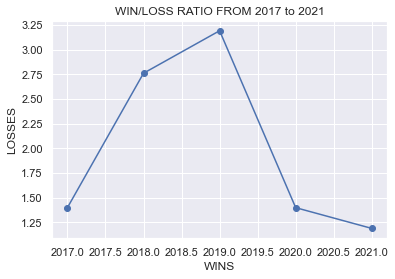

In [109]:
y=[1.4,2.76,3.19,1.4,1.19]
x=[2017,2018,2019,2020,2021]

plt.plot(x,y,marker="o")
plt.xlabel("Loss/Win Ratio")
plt.ylabel("Years")
plt.title("Loss/Win RATIO FROM 2017 to 2021")
plt.show()